<a href="https://colab.research.google.com/github/Ommanchanda/Machine_Learning/blob/main/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data=fetch_california_housing()

In [4]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df['Price']=data.target

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
df.shape

(20640, 9)

In [10]:
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
2787,4.3370,26.0,5.994264,1.001912,1385.0,2.648184,37.37,-118.45,1.39700
19262,3.8750,20.0,5.838000,1.016000,1711.0,3.422000,38.44,-122.73,1.40300
10725,9.8589,18.0,7.100719,0.935252,808.0,2.906475,33.64,-117.82,5.00001
9400,7.1924,52.0,5.715942,0.947826,755.0,2.188406,37.91,-122.56,5.00001
9926,3.9000,25.0,5.744083,1.094675,1641.0,2.427515,38.30,-122.31,1.87300
3881,4.8646,36.0,5.488971,1.047794,766.0,2.816176,34.22,-118.51,2.13200
1537,5.6986,20.0,5.677051,1.084112,2310.0,2.398754,37.90,-122.04,2.75800
13109,4.4500,10.0,5.834753,1.071550,1538.0,2.620102,38.41,-121.38,1.38700
132,7.4882,35.0,6.467269,1.038375,1072.0,2.419865,37.84,-122.20,3.19300
2658,1.3190,16.0,6.404908,1.641104,816.0,2.503067,40.22,-124.00,0.70700


In [11]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [13]:
y

,Price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [16]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [18]:
y_pred=dtr.predict(x_test)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6146396317014001

In [20]:
parameters={
    'criterion' : ['squared_error','absolute_error','friedman_mse'],
    'splitter' : ['best','random'],
    'max_depth' : [1,2,3,4,10],
    'max_features' : ['auto','sqrt','log2']

}

In [21]:
from sklearn.model_selection import GridSearchCV

In [25]:
model=GridSearchCV(dtr,param_grid=parameters,cv=3,scoring='neg_mean_squared_error',verbose=3)

In [26]:
model.fit(x_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=squared_error, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=squared_error, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=squared_error, max_depth=1, max_features=sqrt, splitter=best;, score=-1.331 total time=   0.0s
[CV 2/3] END criterion=squared_error, max_depth=1, max_features=sqrt, splitter=best;, score=-0.915 total time=   0.0s
[CV 3/

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [27]:
model.best_params_

{'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [28]:
final_model=DecisionTreeRegressor(criterion='absolute_error',max_depth=10,max_features='log2',splitter='best')

In [29]:
final_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      max_features='log2')

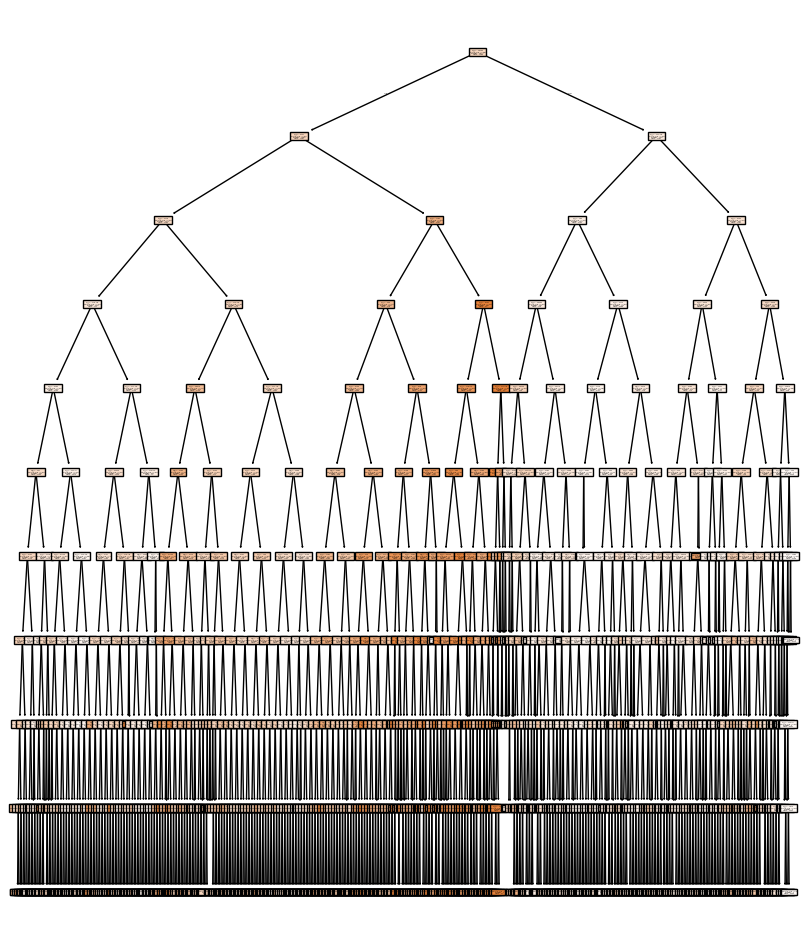

In [32]:
from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(final_model,filled=True)
plt.show()

In [33]:
y_pred1=final_model.predict(x_test)

In [34]:
r2_score(y_pred1,y_test)

0.5831984923311972